In [216]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import os
import pathlib
import matplotlib.pyplot as plt
import earthpy as et
import csv
import matplotlib.dates as mdates

from pathlib import Path

sensor_csv_folder = Path.home() / "Documents" / "eh scholars" / "raw data" / "weeks1_to_4" / "Data_Clean" # adjust path
all_week = "Weeks1_to_4_cleaned_const_timeseries.csv" # adjust name of file
all_weeks_filepath = os.path.join(sensor_csv_folder, all_week)
all_weeks = pd.read_csv(all_weeks_filepath)

In [217]:
all_weeks['time'] = all_weeks['Date_Time_Format'].str.slice(11, 19)

In [218]:
sensor_info_folder = Path.home() / "Documents" / "eh scholars" # adjust path
sensor_info_name = "Sensor_Locations_ForRaleigh_062725.csv" # adjust name of file
sensor_filepath = os.path.join(sensor_info_folder, sensor_info_name)
sensor_info = pd.read_csv(sensor_filepath)

In [219]:
merged_sensor_info = pd.merge(all_weeks, sensor_info, how='inner', left_on="Sensor_ID", right_on='SensorID')

In [220]:
times = merged_sensor_info['time'].unique()
times.sort()

In [221]:
control = merged_sensor_info[merged_sensor_info['treat_25'] == 0]
treatment = merged_sensor_info[merged_sensor_info['treat_25'] == 1]

ctrl = []
for time in control.groupby('time')['Temperature'].mean():
    ctrl.append(time)
    
grouped_control = control.groupby(['time', 'Sensor_ID'])['Temperature'].mean()

for time in grouped_control:
    hr_dataset = grouped_control.groupby('time').std()

sample_size = 30

standard_error_ctrl = []
for time in ctrl:
    standard_error_ctrl = hr_dataset / np.sqrt(sample_size)

y_lower_ctrl = ctrl - standard_error_ctrl
y_upper_ctrl = ctrl + standard_error_ctrl

treat = []
for time in treatment.groupby('time')['Temperature'].mean():
    treat.append(time)

grouped_treat = treatment.groupby(['time', 'Sensor_ID'])['Temperature'].mean()

for time in grouped_treat:
    hr_dataset = grouped_treat.groupby('time').std()

for time in grouped_treat:
    hr_dataset_treat = grouped_treat.groupby('time').std()

standard_error_treat = []
for time in treat:
    standard_error_treat = hr_dataset_treat / np.sqrt(sample_size)
    
y_lower_treat = treat - standard_error_treat
y_upper_treat = treat + standard_error_treat

In [222]:
control.groupby(['time', 'Sensor_ID'])['Temperature'].mean()

time      Sensor_ID
00:00:00  2401090      77.304167
          2503418      77.933333
          2558026      77.600000
          2558027      77.596000
          2558028      77.472000
                         ...    
23:40:00  3085265      77.543478
          3086527      77.904545
          3086531      76.847826
          3086542      78.320833
          3086554      78.478261
Name: Temperature, Length: 2088, dtype: float64

In [223]:
control[control['time'] == '00:00:00']

,Temperature,Relative_Humidity,Heat_Index,Dew_Point,Date_Time_Format,Sensor_ID,time,SensorID,GMaps_ID,GlobalID,...,Sidewalk,St2Pole_in,SW_Front,SW_Back,Cross_St,SensDirect,StDirect,treat_25,lon_x,lat_y
24,83.2,75.4,91.2,74.6,2025-06-24 00:00:00,2799155,00:00:00,2799155,YELVERTON_GLEN EDEN DR_CDS,9fb4b6b9-b7f8-4d5c-9a16-f5891222f868,...,No,18,NaN,NaN,No,110 E,17 N,0,-78.668627,35.822375
96,84.1,74.2,93.2,75.0,2025-06-25 00:00:00,2799155,00:00:00,2799155,YELVERTON_GLEN EDEN DR_CDS,9fb4b6b9-b7f8-4d5c-9a16-f5891222f868,...,No,18,NaN,NaN,No,110 E,17 N,0,-78.668627,35.822375
168,75.1,87.0,77.7,71.0,2025-06-26 00:00:00,2799155,00:00:00,2799155,YELVERTON_GLEN EDEN DR_CDS,9fb4b6b9-b7f8-4d5c-9a16-f5891222f868,...,No,18,NaN,NaN,No,110 E,17 N,0,-78.668627,35.822375
240,78.2,70.8,80.4,67.9,2025-06-27 00:00:00,2799155,00:00:00,2799155,YELVERTON_GLEN EDEN DR_CDS,9fb4b6b9-b7f8-4d5c-9a16-f5891222f868,...,No,18,NaN,NaN,No,110 E,17 N,0,-78.668627,35.822375
312,78.7,74.1,82.0,69.7,2025-06-28 00:00:00,2799155,00:00:00,2799155,YELVERTON_GLEN EDEN DR_CDS,9fb4b6b9-b7f8-4d5c-9a16-f5891222f868,...,No,18,NaN,NaN,No,110 E,17 N,0,-78.668627,35.822375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94260,76.6,72.3,77.9,67.0,2025-07-05 00:00:00,2968898,00:00:00,2968898,GORMAN_KAPLAN DR_BRENT RD,6895ef91-6425-44e3-be2f-0dc9dba624f5,...,Yes,111,Yes,No,No,160 S,70 E,0,-78.692593,35.773058
94332,74.6,91.7,77.5,72.0,2025-07-06 00:00:00,2968898,00:00:00,2968898,GORMAN_KAPLAN DR_BRENT RD,6895ef91-6425-44e3-be2f-0dc9dba624f5,...,Yes,111,Yes,No,No,160 S,70 E,0,-78.692593,35.773058
94404,73.1,97.9,76.3,72.4,2025-07-07 00:00:00,2968898,00:00:00,2968898,GORMAN_KAPLAN DR_BRENT RD,6895ef91-6425-44e3-be2f-0dc9dba624f5,...,Yes,111,Yes,No,No,160 S,70 E,0,-78.692593,35.773058
94476,80.8,86.5,89.2,76.4,2025-07-08 00:00:00,2968898,00:00:00,2968898,GORMAN_KAPLAN DR_BRENT RD,6895ef91-6425-44e3-be2f-0dc9dba624f5,...,Yes,111,Yes,No,No,160 S,70 E,0,-78.692593,35.773058


In [224]:
control = merged_sensor_info[merged_sensor_info['treat_25'] == 0]
treatment = merged_sensor_info[merged_sensor_info['treat_25'] == 1]

control_stats = control.groupby('time')['Temperature'].agg(['mean', 'std', 'count']).reset_index(drop = True)
treatment_stats = treatment.groupby('time')['Temperature'].agg(['mean', 'std', 'count']).reset_index(drop = True)

control_stats['ci'] = 1.96 * control_stats['std'] / np.sqrt(control_stats['count'])
control_stats['ci_lower'] = control_stats['mean'] - control_stats['ci']
control_stats['ci_upper'] = control_stats['mean'] + control_stats['ci']

treatment_stats['ci'] = 1.96 * treatment_stats['std'] / np.sqrt(treatment_stats['count'])
treatment_stats['ci_lower'] = treatment_stats['mean'] - treatment_stats['ci']
treatment_stats['ci_upper'] = treatment_stats['mean'] + treatment_stats['ci']

Text(0, 0.5, 'Temperature (°F)')

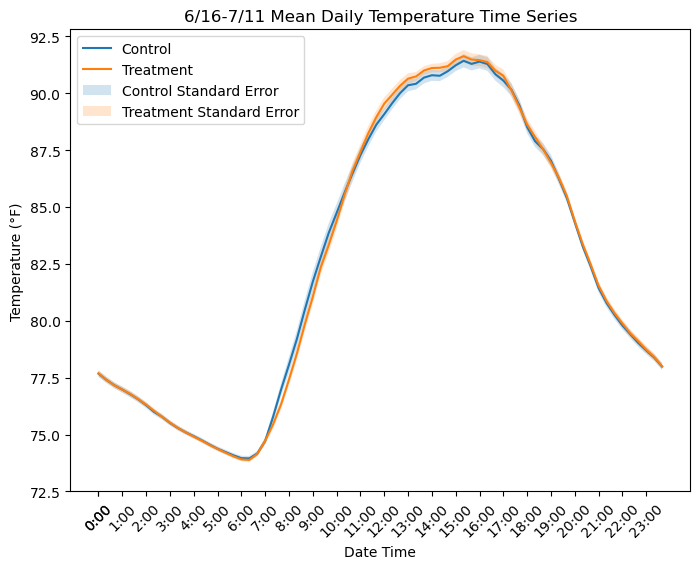

In [225]:
plt.figure(figsize=(8, 6))

plt.plot(times, control.groupby('time')['Temperature'].mean(), label='Control')
plt.plot(times, treatment.groupby('time')['Temperature'].mean(), label='Treatment')

x_positions = ['00:00:00', '01:00:00', '02:00:00', '03:00:00','04:00:00','05:00:00','06:00:00','07:00:00',
              '08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00',
              '16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00','00:00:00']
x_labels = ['0:00','1:00', '2:00', '3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00','0:00']

plt.fill_between(times, y_lower_ctrl, y_upper_ctrl, alpha=0.2, label='Control Standard Error')
plt.fill_between(times, y_lower_treat, y_upper_treat, alpha=0.2, label='Treatment Standard Error')
plt.legend()
plt.yticks(np.arange(72.5, 93 , 2.5))
plt.xticks(x_positions, x_labels, 
    rotation=45)
plt.title('6/16-7/11 Mean Daily Temperature Time Series')
plt.xlabel('Date Time')
plt.ylabel ('Temperature (\u00B0F)')

In [226]:
shaded = merged_sensor_info[merged_sensor_info['Shade'] == "Yes"]
unshaded = merged_sensor_info[merged_sensor_info['Shade'] == "No"]

shaded_stats = shaded.groupby('time')['Temperature'].agg(['mean', 'std', 'count']).reset_index(drop = True)
unshaded_stats = unshaded.groupby('time')['Temperature'].agg(['mean', 'std', 'count']).reset_index(drop = True)

shaded_stats['ci'] = 1.96 * shaded_stats['std'] / np.sqrt(shaded_stats['count'])
shaded_stats['ci_lower'] = shaded_stats['mean'] - shaded_stats['ci']
shaded_stats['ci_upper'] = shaded_stats['mean'] + shaded_stats['ci']

unshaded_stats['ci'] = 1.96 * unshaded_stats['std'] / np.sqrt(unshaded_stats['count'])
unshaded_stats['ci_lower'] = unshaded_stats['mean'] - unshaded_stats['ci']
unshaded_stats['ci_upper'] = unshaded_stats['mean'] + unshaded_stats['ci']

Text(0, 0.5, 'Temperature (°F)')

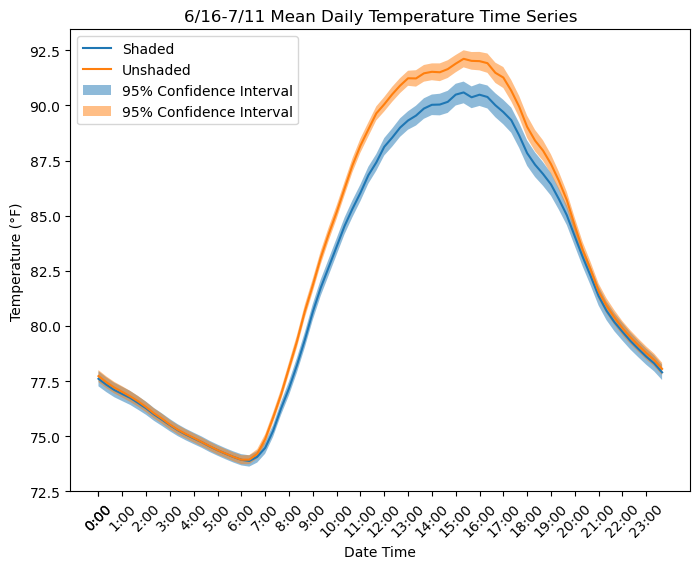

In [227]:
plt.figure(figsize=(8, 6))

plt.plot(times, shaded_stats['mean'], label='Shaded')
plt.plot(times, unshaded_stats['mean'], label='Unshaded')

plt.fill_between(times, shaded_stats['ci_lower'], shaded_stats['ci_upper'], alpha=0.5, label='95% Confidence Interval') 
plt.fill_between(times, unshaded_stats['ci_lower'], unshaded_stats['ci_upper'], alpha=0.5,label='95% Confidence Interval') 

plt.legend()
plt.yticks(np.arange(72.5, 93 , 2.5))
plt.xticks(x_positions, x_labels, rotation=45)
plt.title('6/16-7/11 Mean Daily Temperature Time Series')
plt.xlabel('Date Time')
plt.ylabel ('Temperature (\u00B0F)')